# QuicklyStart

## This is a quick start guide to show users what [*mdapy*](https://github.com/mushroomfire/mdapy) can do and how it should be implemented, for more specific information check out the [API](https://mdapy.readthedocs.io/en/latest/modules.html) in the documentation.

### Import corresponding packages

In [1]:
import mdapy as mp
import numpy as np
import os
mp.init() # Run on CPU

[Taichi] version 1.2.0, llvm 10.0.0, commit f189fd79, win, python 3.8.15
[Taichi] Starting on arch=x64


### Generate a <font color=#008000>System</font> class from a dump file, which can be found in example folder and come from the Supplementary materials of [this paper](https://doi.org/10.1038/s41467-021-25264-5).

In [2]:
system = mp.System('../../../example/CoCuFeNiPd-4M.dump')

### Check the data of <font color=#008000>System</font>.

In [3]:
system.data.head()

,id,type,x,y,z
0,1,2,0.006118,-0.310917,-0.345241
1,2,4,1.901900,-0.292456,1.484880
2,3,3,-0.015641,1.584320,1.431290
3,4,5,1.862370,1.511170,-0.372278
4,5,5,3.792570,-0.331891,-0.375830


### Calculate the average entropy fingerprint.

In [4]:
system.cal_atomic_entropy(rc=3.6*1.4, sigma=0.2, compute_average=True, average_rc=3.6*0.9)

### Calculate the CSP.

In [5]:
system.cal_centro_symmetry_parameter()

### Calculate the CNA pattern.

In [6]:
system.cal_common_neighbor_analysis(3.6*0.8536)

### Calculate the Voronoi volume.

In [7]:
system.cal_voronoi_volume()

### Check the calculated results.

In [8]:
system.data.head()

,id,type,x,y,z,atomic_entropy,ave_atomic_entropy,csp,cna,voronoi_volume,voronoi_number,cavity_radius
0,1,2,0.006118,-0.310917,-0.345241,-6.045962,-6.520932,0.100697,1,12.681010,15,3.675684
1,2,4,1.901900,-0.292456,1.484880,-6.694110,-6.731285,0.139544,1,12.012947,14,3.581766
2,3,3,-0.015641,1.584320,1.431290,-6.876412,-6.720047,0.094929,1,12.197214,12,3.674408
3,4,5,1.862370,1.511170,-0.372278,-7.013986,-6.996050,0.072999,1,12.900968,15,3.713117
4,5,5,3.792570,-0.331891,-0.375830,-6.732498,-6.900815,0.046358,1,12.400861,14,3.645415


### Check the cutoff distance now.

In [9]:
system.rc

5.04

### Neighbor atom index of atom $0$ withing the cutoff distance.

In [10]:
system.verlet_list[0][system.verlet_list[0]>-1]

array([8787, 8786, 8785, 8683, 8678, 8677, 8676, 7890, 7887, 7886, 7885,
       7785, 7782, 7779, 7778, 7777, 7776, 1012, 1010, 1009, 1008, 1007,
        902,  901,  899,  897,  896,  895,  894,  115,  113,  111,  110,
        109,  108,   10,    9,    7,    6,    5,    4,    3,    2,    1])

### Corresponding distance from atom $0$ to its neighbor atoms.

In [11]:
system.distance_list[0][system.verlet_list[0]>-1]

array([4.48415811, 4.63487348, 4.35032952, 4.32684229, 2.57315662,
       4.56321863, 4.28528331, 4.59095292, 4.66009997, 4.7530261 ,
       2.75477797, 4.39168494, 4.61796981, 2.72325745, 4.7209429 ,
       2.60048908, 3.89905168, 4.59982446, 4.55429458, 2.58034708,
       4.31587082, 5.02071962, 4.39625619, 4.94515597, 4.54722966,
       2.5790717 , 2.51207536, 4.33703624, 3.40006539, 4.52692729,
       4.59187952, 4.58003206, 2.63799678, 2.64905374, 3.73204146,
       4.42655427, 3.47691914, 4.43249288, 3.67048701, 4.59684361,
       3.78663373, 2.60123122, 2.59777966, 2.63508509])

### Validate the distance between atom $0$ and atom $8787$.

In [12]:
system.atom_distance(0, 8787)

4.484158107630933

### Save the results to the disk.

In [13]:
system.write_dump()

### Do the spatial binning of entropy along $xy$ plane.

In [14]:
system.spatial_binning('xy', 'ave_atomic_entropy', 4.)

### Binning coordinations.

In [15]:
system.Binning.coor

{'x': array([-0.289603,  3.710397,  7.710397, 11.710397, 15.710397, 19.710397,
        23.710397, 27.710397, 31.710397, 35.710397, 39.710397, 43.710397]),
 'y': array([-0.559109,  3.440891,  7.440891, 11.440891, 15.440891, 19.440891,
        23.440891, 27.440891, 31.440891, 35.440891, 39.440891, 43.440891])}

### Plot the binning results.

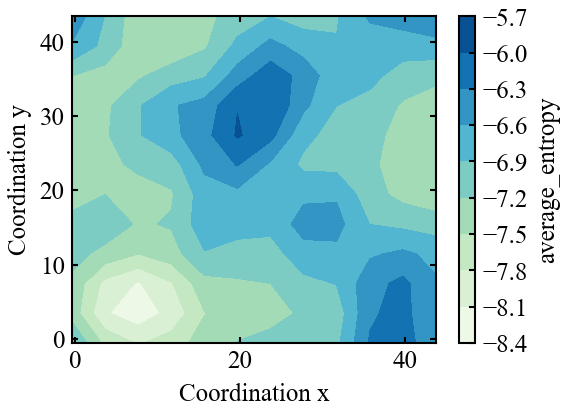

In [16]:
fig, ax = system.Binning.plot(bar_label='average_entropy')

### Calculate the WCP to reveal the short-range order in alloy.

In [17]:
system.cal_warren_cowley_parameter()

### Results show high SRO degree.

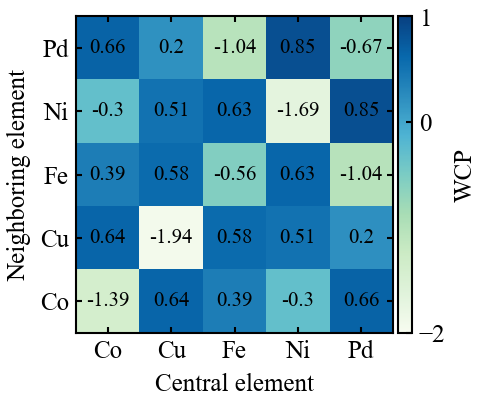

In [18]:
fig, ax = system.WarrenCowleyParameter.plot(['Co', 'Cu', 'Fe', 'Ni', 'Pd'])

### Calculate the radiul distribution function (RDF).

In [19]:
system.cal_pair_distribution()

### Plot the RDF results.

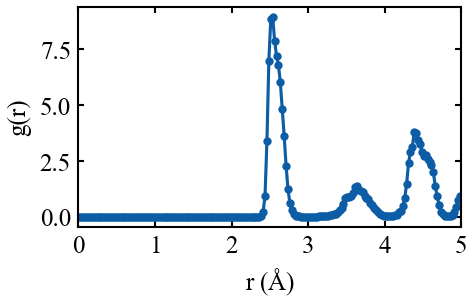

In [20]:
fig, ax = system.PairDistribution.plot()

### Plot the partial RDF results.

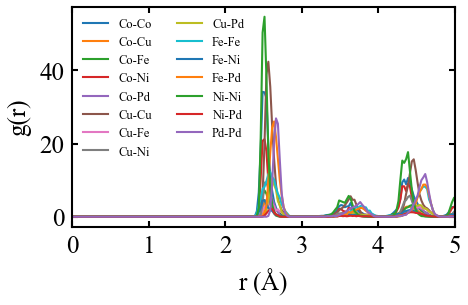

In [21]:
fig, ax = system.PairDistribution.plot_partial(['Co', 'Cu', 'Fe', 'Ni', 'Pd'])

### One can save the figure easily.

In [22]:
fig.savefig('rdf.png', dpi=300)
os.remove('rdf.png') # Here just remove the saved figure.

### Analyze the atomic trajectories

### Generate a random walk trajectories.

In [23]:
Nframe, Nparticles = 200, 1000
pos_list = np.cumsum(
    np.random.choice([-1.0, 0.0, 1.0], size=(Nframe, Nparticles, 3)), axis=0
)

### Calculate the mean squared displacement (MSD).

In [24]:
MSD = mp.MeanSquaredDisplacement(pos_list=pos_list, mode="windows")
MSD.compute()

### Check the MSD results.

In [25]:
MSD.msd[:10]

array([-3.87268067e-06,  1.99792392e+00,  3.99351508e+00,  5.99446200e+00,
        8.00303187e+00,  1.00093342e+01,  1.20223563e+01,  1.40358601e+01,
        1.60526698e+01,  1.80698912e+01])

### Plot the MSD results.

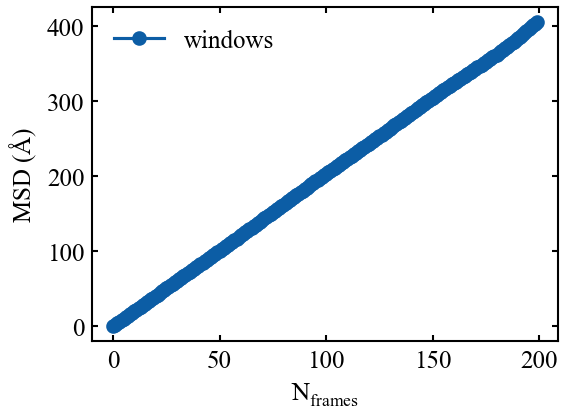

In [26]:
fig, ax = MSD.plot()

### Calculate the Lindemann index.

In [27]:
LDML = mp.LindemannParameter(pos_list)
LDML.compute()

### Plot the Lindemann index results.

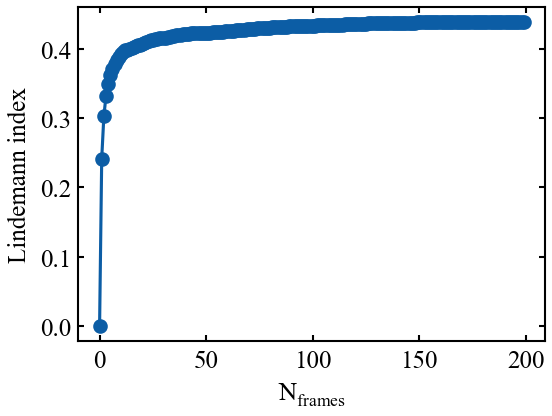

In [28]:
fig, ax = LDML.plot()

### Analyze EAM potential.

### Generate an average EAM potential is simple.

In [29]:
EAMave = mp.EAMAverage('../../../example/CoNiFeAlCu.eam.alloy', [0.2]*5)

### Read this average potential file.

In [30]:
potential = mp.EAM('./CoNiFeAlCu.average.eam.alloy')

### Plot the results. $A$ is the virtual element.

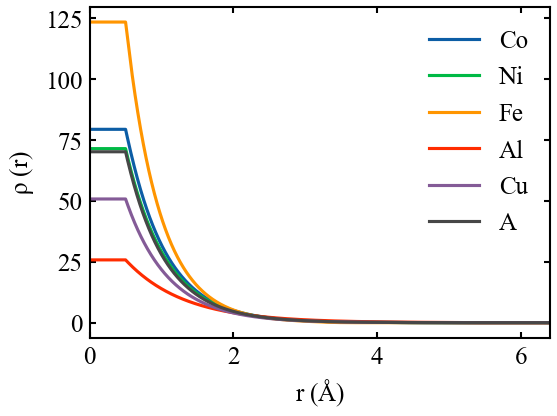

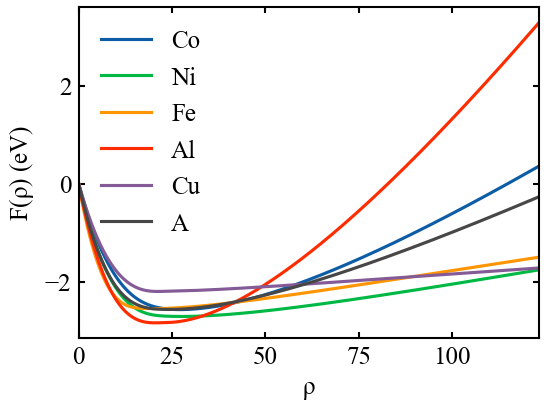

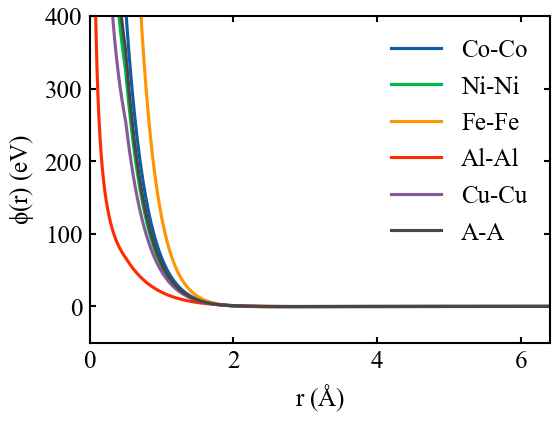

In [31]:
potential.plot()

In [32]:
os.remove('CoNiFeAlCu.average.eam.alloy') # Here just remove this average EAM file.